<a href="https://colab.research.google.com/github/OmahTechLtd/Oil-Gas/blob/main/Oil_GasProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil and Gas Predictive Maintenance

In this project, we explore how machine learning can be applied to predictive maintenance in the oil and gas industry.  
The goal is to use sensor readings and equipment data to predict failures before they occur. This can help reduce downtime, improve safety, and save costs.

## Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Visualize important patterns and correlations in the data.
3. Build predictive models to classify different types of equipment failures.
4. Evaluate model performance and interpret results.
5. Demonstrate how AI can provide value in oil and gas operations.

## Dataset
We are using the **UCI Predictive Maintenance dataset**, which contains equipment operating data and failure labels.  
This dataset is a good starting point for simulating how predictive maintenance can be applied in real-world oil and gas settings.

## Workflow
- Load and clean the dataset
- Conduct EDA and visualize key features
- Train classification models such as Logistic Regression, Random Forest, and XGBoost
- Compare results and highlight insights
- Prepare charts and visuals to showcase in the demo web app

## Expected Outcome
By the end of this project, we will demonstrate how AI models can detect early warning signs of equipment failure.  
This serves as a proof of concept for intelligent maintenance systems in oil and gas, while paving the way for future use with real Nigerian datasets.

Saving predictive_maintenance.csv to predictive_maintenance.csv
(10000, 14)
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   H

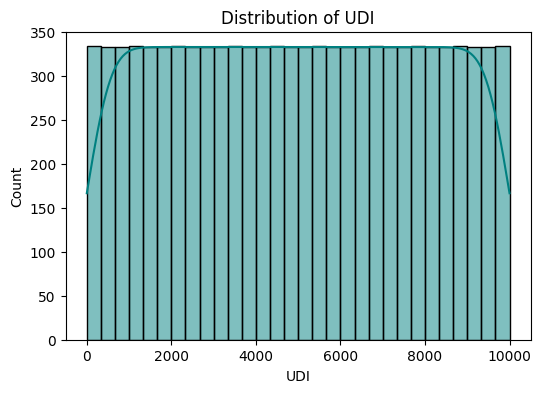

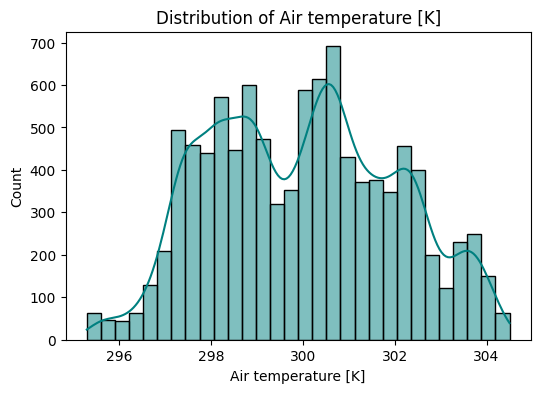

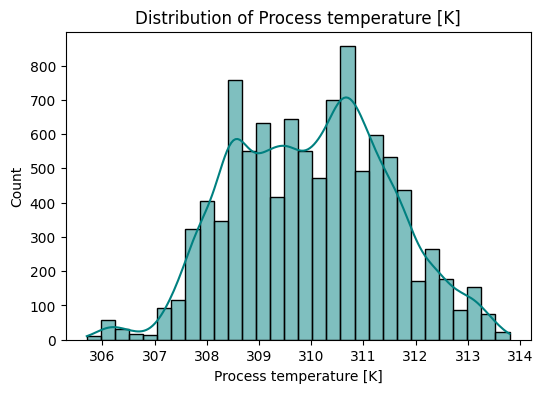

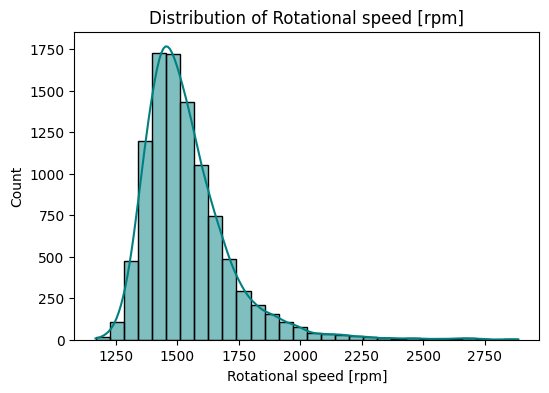

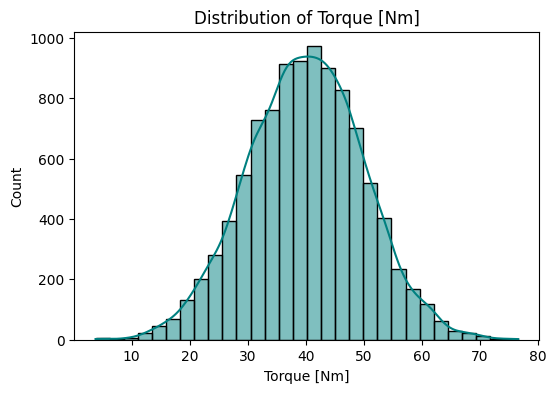

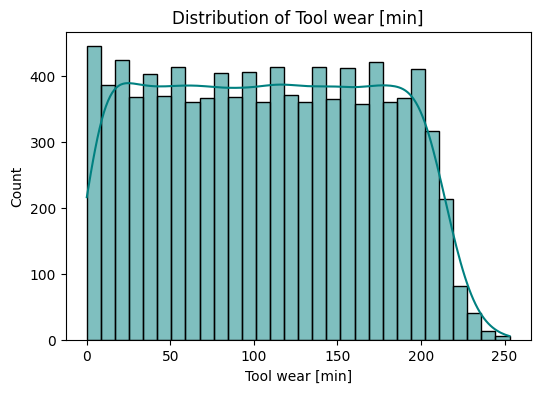

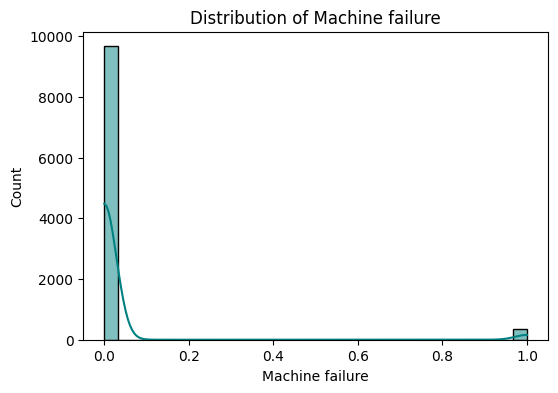

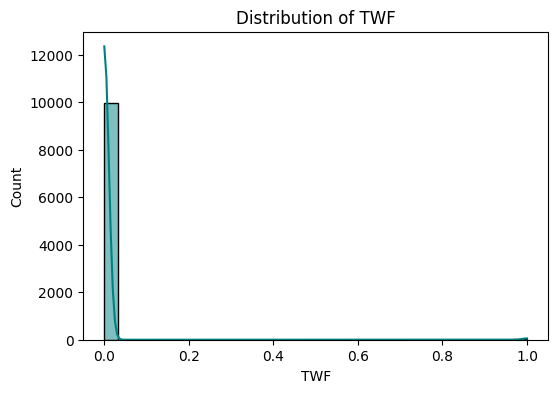

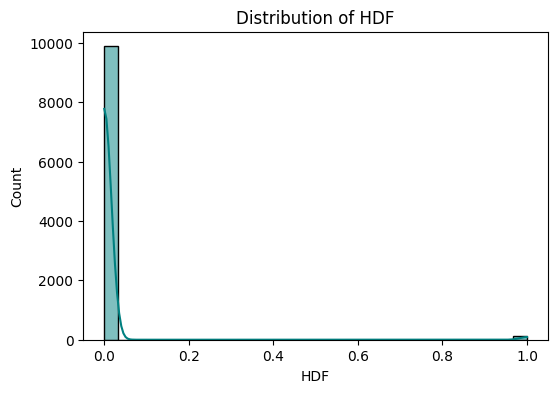

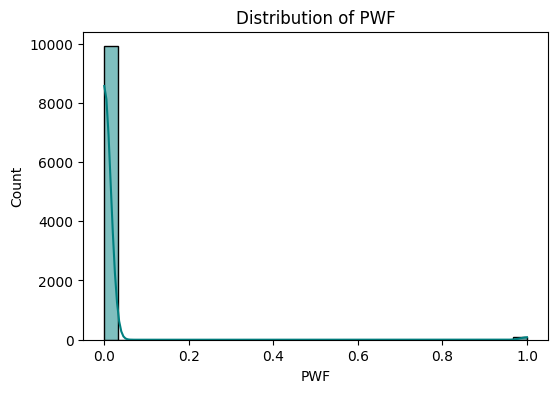

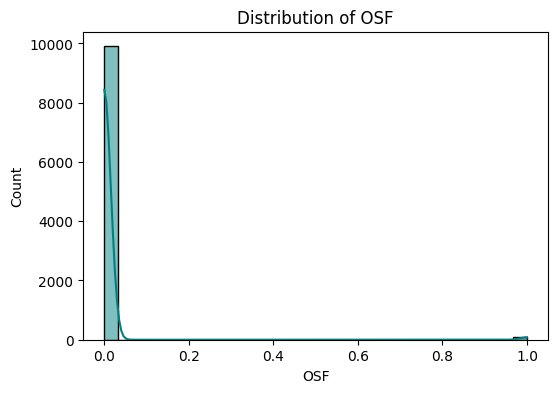

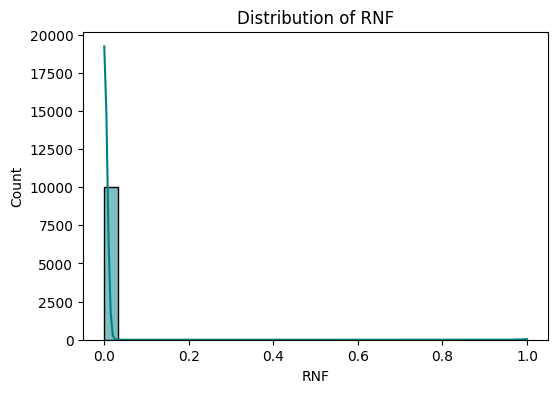

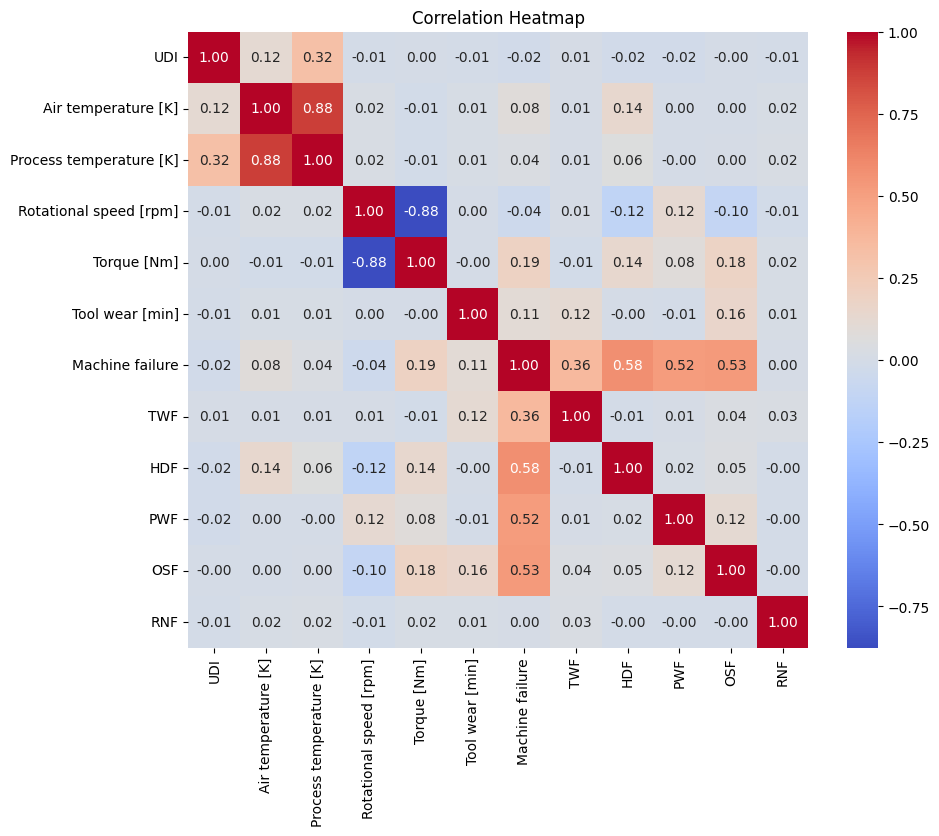

In [ ]:
# Step 1: Install essentials (
!pip install pandas matplotlib seaborn scikit-learn

# Step 2: Import libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil


# Step 3: Load dataset
# Upload file
uploaded = files.upload()
df = pd.read_csv("predictive_maintenance.csv")

# Quick look
print(df.shape)
print(df.head())
print(df.info())

# Step 4: Summary stats
print(df.describe())

# Step 5: Make directory for saving charts
os.makedirs("assets/oilgas", exist_ok=True)

# Step 6: Plot distributions of numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.savefig(f"assets/oilgas/{col}_dist.png", bbox_inches="tight")  # save first
    plt.show()  # then show
    plt.close()

# Step 7: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.savefig("assets/oilgas/correlation_heatmap.png", bbox_inches="tight")
plt.show()
plt.close()

# Step 8: Target distribution (assuming 'Failure Type' or 'Target' column exists)
if "Failure Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Failure Type", data=df, palette="viridis")
    plt.title("Failure Type Distribution")
    plt.savefig("assets/oilgas/failure_type_dist.png", bbox_inches="tight")
    plt.show()
    plt.close()

# Step 9: Pairplot of selected features vs Failure Type
if "Failure Type" in df.columns:
    selected_cols = num_cols[:4]  # pick 4 numeric columns to keep it readable
    sns.pairplot(df[selected_cols + ["Failure Type"]], hue="Failure Type", diag_kind="kde", palette="husl")
    plt.savefig("assets/oilgas/pairplot_failure_type.png", bbox_inches="tight")
    plt.show()

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# Preprocessing & splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay


# Create multi-class target
df['Failure_Type'] = 'No Failure'
for col in ['TWF','HDF','PWF','OSF','RNF']:
    df.loc[df[col] == 1, 'Failure_Type'] = col

# Features & target
X_multi = df.drop(columns=['UDI','Product ID','Machine failure','TWF','HDF','PWF','OSF','RNF','Failure_Type'])
y_multi = df['Failure_Type']

# Encode categorical variable 'Type'
X_multi = pd.get_dummies(X_multi, columns=['Type'], drop_first=True)

# Train/Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

# Initialize scaler
scaler = StandardScaler()

# Scaling
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

#  Train Models
multi_models = {
    "Decision Tree (Multi)": DecisionTreeClassifier(max_depth=6, random_state=42, class_weight="balanced"),
    "Random Forest (Multi)": RandomForestClassifier(n_estimators=150, random_state=42, class_weight="balanced")
}

for name, model in multi_models.items():
    model.fit(X_train_m_scaled, y_train_m)
    y_pred_m = model.predict(X_test_m_scaled)
    print(f"\n{name} Results")
    print(classification_report(y_test_m, y_pred_m))

    # Confusion matrix
    cm = confusion_matrix(y_test_m, y_pred_m, labels=model.classes_)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"assets/oilgas/{name.replace(' ','_')}_multi_cm.png")
    plt.close()


Decision Tree (Multi) Results
              precision    recall  f1-score   support

         HDF       0.27      0.95      0.43        21
  No Failure       1.00      0.67      0.80      1930
         OSF       0.63      0.85      0.72        20
         PWF       0.68      0.88      0.77        17
         RNF       0.00      0.50      0.01         4
         TWF       0.05      1.00      0.10         8

    accuracy                           0.67      2000
   macro avg       0.44      0.81      0.47      2000
weighted avg       0.98      0.67      0.79      2000


Random Forest (Multi) Results
              precision    recall  f1-score   support

         HDF       1.00      0.67      0.80        21
  No Failure       0.98      1.00      0.99      1930
         OSF       0.91      0.50      0.65        20
         PWF       1.00      0.53      0.69        17
         RNF       0.00      0.00      0.00         4
         TWF       0.00      0.00      0.00         8

    accuracy   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree (Binary) Results
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2898
           1       0.78      0.98      0.87       102

    accuracy                           0.99      3000
   macro avg       0.89      0.99      0.93      3000
weighted avg       0.99      0.99      0.99      3000

Random Forest (Binary) Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



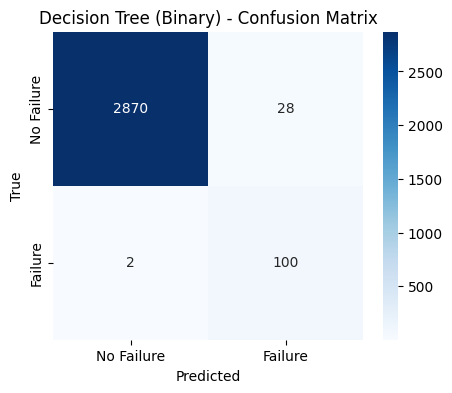

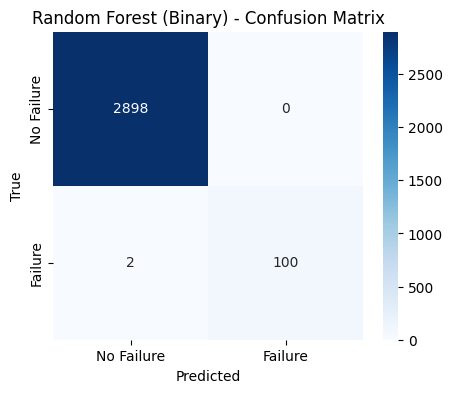

In [ ]:
# ------------------------------
# Binary Classification Pipeline
# ------------------------------
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Create binary target (Failure = 1, No Failure = 0)
df["FailureBinary"] = df["Machine failure"].apply(lambda x: 1 if x == 1 else 0)

X = df.drop(columns=["Machine failure", "FailureBinary", "UDI", "Product ID"])
y = df["FailureBinary"]

# One-hot encode categorical 'Type'
X = pd.get_dummies(X, drop_first=True)

# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_bin = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight="balanced")
dt_bin.fit(X_train_scaled, y_train)
y_pred_dt = dt_bin.predict(X_test_scaled)

print("Decision Tree (Binary) Results")
print(classification_report(y_test, y_pred_dt))

# Step 3: Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_bin = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_bin.fit(X_train_scaled, y_train)
y_pred_rf = rf_bin.predict(X_test_scaled)

print("Random Forest (Binary) Results")
print(classification_report(y_test, y_pred_rf))

# Step 4: Confusion Matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, preds in [("Decision Tree (Binary)", y_pred_dt), ("Random Forest (Binary)", y_pred_rf)]:
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure","Failure"], yticklabels=["No Failure","Failure"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- Binary Setup ---
X_b = df.drop(columns=["Machine failure", "UDI", "Product ID"])
X_b = pd.get_dummies(X_b, drop_first=True)
y_b = df["Machine failure"]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)

rf_b = RandomForestClassifier(random_state=42)
rf_b.fit(X_train_b_scaled, y_train_b)


# --- Multi-Class Setup ---
X_m = df.drop(columns=["Failure_Type", "UDI", "Product ID", "Machine failure"])
X_m = pd.get_dummies(X_m, drop_first=True)
y_m = df["Failure_Type"]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

rf_m = RandomForestClassifier(random_state=42)
rf_m.fit(X_train_m_scaled, y_train_m)

RandomForestClassifier(random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Make folder
os.makedirs("assets/oilgas", exist_ok=True)

### ---- 1. EDA charts (pick 2 examples) ----
sns.histplot(df["Torque [Nm]"], bins=30, kde=True, color="teal")
plt.title("Torque Distribution")
plt.savefig("assets/oilgas/torque_dist.png")
plt.close()

sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig("assets/oilgas/corr_heatmap.png")
plt.close()


### ---- 2. Confusion Matrix (Binary) ----
from sklearn.metrics import ConfusionMatrixDisplay

cm_bin = confusion_matrix(y_test_b, rf_b.predict(X_test_b_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bin, display_labels=rf_b.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Binary Classification")
plt.savefig("assets/oilgas/confusion_matrix_binary.png")
plt.close()


### ---- 3. Confusion Matrix (Multi) ----
cm_multi = confusion_matrix(y_test_m, rf_m.predict(X_test_m_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=rf_m.classes_)
disp.plot(cmap="Oranges", xticks_rotation=45)
plt.title("Confusion Matrix - Multi-Class Classification")
plt.savefig("assets/oilgas/confusion_matrix_multi.png")
plt.close()


### ---- 4. ROC Curve (Binary) ----
y_prob = rf_b.predict_proba(X_test_b_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test_b, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.title("ROC Curve - Binary Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("assets/oilgas/roc_curve_binary.png")
plt.close()


### ---- 5. Feature Importance (Random Forest) ----
importances = rf_b.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices][:10], y=X_train_b.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances (Binary RF)")
plt.savefig("assets/oilgas/feature_importance.png")
plt.close()

/tmp/ipython-input-1022836419.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X_train_b.columns[indices][:10], palette="viridis")


In [ ]:
# First, zip the folder
#import shutil
#shutil.make_archive("oilgas_results", 'zip', "assets/oilgas")

# Then download the zip
#from google.colab import files
#files.download("oilgas_results.zip")